In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
###
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.express as px
###
from jupyter_dash import JupyterDash
import random

C:\Users\MY PC\AppData\Local\Temp\ipykernel_22176\2888968924.py:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\MY PC\AppData\Local\Temp\ipykernel_22176\2888968924.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [4]:
#loadig the dataset
folder_path=r"C:\Users\MY PC\Downloads"
file_path=os.path.join(folder_path,"health_insurance_uncleaned.csv")
df=pd.read_csv(file_path)
display(df.head())
df.info()

,age,sex,bmi,ChildRen,smoker,regIon,chargeS
0,19,female,27.900,0.0,1,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,NaN,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   ChildRen  1336 non-null   float64
 4   smoker    1334 non-null   object 
 5   regIon    1337 non-null   object 
 6   chargeS   1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
print('shape:',df.shape)
print(df.info())
print("###")
print(df.duplicated().sum())
print('###')
print(df.isnull().sum())
print("###")
print(df.columns)

shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   ChildRen  1336 non-null   float64
 4   smoker    1334 non-null   object 
 5   regIon    1337 non-null   object 
 6   chargeS   1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None
###
1
###
age         0
sex         0
bmi         2
ChildRen    2
smoker      4
regIon      1
chargeS     3
dtype: int64
###
Index(['age', 'sex', 'bmi', 'ChildRen', 'smoker', 'regIon', 'chargeS'], dtype='object')


In [6]:
#data cleaning
df.columns=df.columns.str.lower()
df.columns=df.columns.str.strip()
df=df.dropna()#since the null values are not significant
cat_cols=list(df.select_dtypes(exclude=np.number).columns)
num_cols=list(df.select_dtypes(include=np.number).columns)
###
for col in cat_cols:
    print(col)
    df[col]=df[col].str.lower()
    df[col]=df[col].str.strip()
    print(df[col].unique())
    print('###')
#smoker column needs cleaning
df['smoker']=df['smoker'].replace(['0','1'],['no','yes'])
df['children']=df['children'].astype('object') # as categories 0/1/2/3/4/5

sex
['female' 'male']
###
smoker
['1' 'no' 'yes' '0']
###
region
['southwest' 'southeast' 'northwest' 'northeast']
###


In [7]:
#reassign the cat and num cols list after u changed the dtype of 'children column'
cat_cols=list(df.select_dtypes(exclude=np.number).columns)
num_cols=list(df.select_dtypes(include=np.number).columns)
df['children'].unique()

array([0.0, 1.0, 3.0, 2.0, 5.0, 4.0], dtype=object)

In [8]:
print(df.info())
print(df.columns)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1327 non-null   int64  
 1   sex       1327 non-null   object 
 2   bmi       1327 non-null   float64
 3   children  1327 non-null   object 
 4   smoker    1327 non-null   object 
 5   region    1327 non-null   object 
 6   charges   1327 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 82.9+ KB
None
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0.0,yes,southwest,16884.9240
1,18,male,33.77,1.0,no,southeast,1725.5523
2,28,male,33.00,3.0,no,southeast,4449.4620
4,32,male,28.88,0.0,no,northwest,3866.8552
5,31,female,25.74,0.0,no,southeast,3756.6216


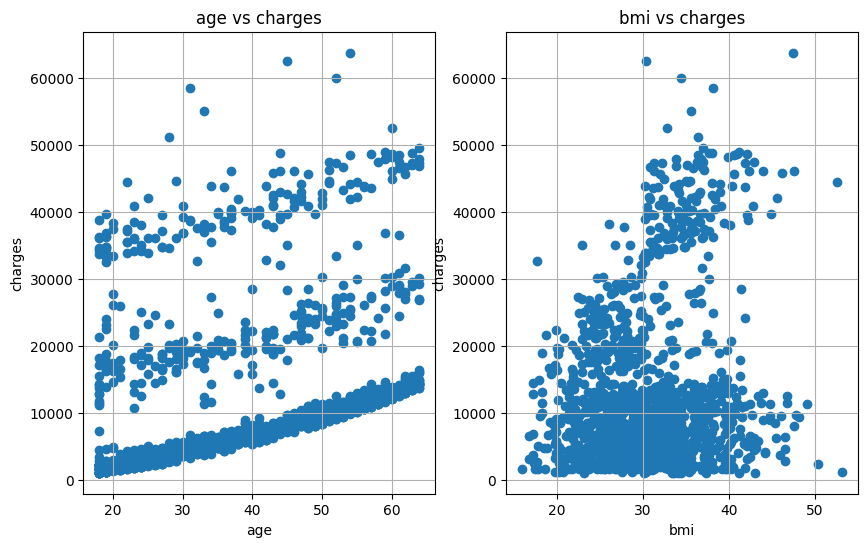

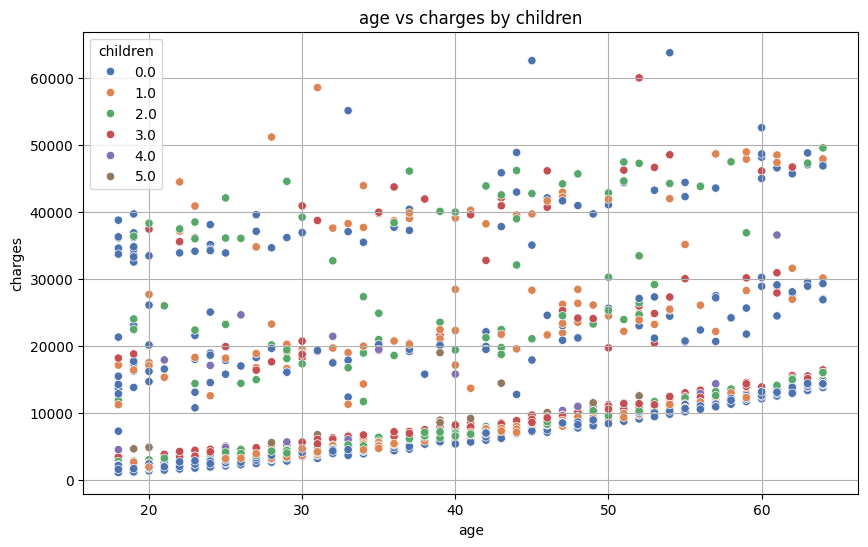

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(df['age'],df['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')
plt.grid(True)
###
plt.subplot(1,2,2)
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')
plt.grid(True)
plt.show()
###
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='age',y='charges',hue='children',palette='deep',markers=True)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges by children')
plt.grid(True)
plt.show()

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output
import random
from jupyter_dash import JupyterDash

# Initialize Dash for Jupyter Lab (External Mode)
app = dash.Dash(__name__)
app.title = "Health Insuance Dashboard"  # Browser tab title

# Global Chart Style
chart_layout = {
    "paper_bgcolor": "#2C3E50",
    "plot_bgcolor": "#34495E",
    "font": {"color": "white"},
    "title": {"x": 0.5},
}

# Layout
app.layout = html.Div(
    style={
        "background-image": "url('https://www.transparenttextures.com/patterns/diamond-upholstery.png')",
        "background-color": "#2C3E50",
        "color": "white",
        "font-family": "Arial, sans-serif",
        "min-height": "100vh",
        "padding": "20px",
    },
    children=[
        # Header
        html.Div(
            style={
                "background-color": "#34495E",
                "padding": "20px",
                "border-radius": "10px",
                "text-align": "center",
                "box-shadow": "0px 4px 10px rgba(0,0,0,0.5)",
            },
            children=[
                html.H1("Health Insuance Dashboard",
                        style={"color": "white", "font-size": "36px", "margin": "0"}),
                html.P(
                    "Analyze sales and profit data across regions, categories, and time",
                    style={"color": "#D5D8DC", "font-size": "18px", "margin-top": "10px"},
                ),
            ],
        ),

        # Filters Section
        html.Div(
            style={
                "display": "flex",
                "justify-content": "space-between",
                "padding": "20px",
            },
            children=[
                # Region Filter
                dcc.Dropdown(
                    id="region-filter",
                    options=[{"label": region, "value": region} for region in df["region"].unique()],
                    value=None,  # Default value is None (no filter selected)
                    placeholder="Select a Region",
                    style={
                        "width": "45%",
                        "background-color": "#ECF0F1",
                        "color": "black",
                        "border-radius": "5px",
                        "padding": "10px",
                    },
                ),
                # Children Filter
                dcc.Dropdown(
                    id="children-filter",
                    options=[{"label": children, "value": children} for children in df["children"].unique()],
                    value=None,  # Default value is None (no filter selected)
                    placeholder="Select number of Children",
                    style={
                        "width": "45%",
                        "background-color": "#ECF0F1",
                        "color": "black",
                        "border-radius": "5px",
                        "padding": "10px",
                    },
                ),
            ],
        ),

        # Charts Section - First Row
        html.Div(
            style={
                "display": "flex",
                "justify-content": "space-between",
                "padding": "20px",
            },
            children=[
                dcc.Graph(id='scatter-fig1', style={"width": "48%", "border-radius": "10px"}),
                dcc.Graph(id='scatter-fig2', style={"width": "48%", "border-radius": "10px"}),
            ],
        ),

        # Second Row - Age vs Charges by Children
        html.Div(
            style={"padding": "20px"},
            children=[
                dcc.Graph(id='scatter-fig3', style={"width": "100%", "border-radius": "10px"}),
            ],
        ),

        # Third Row - Box Plot
        html.Div(
            style={"padding": "20px"},
            children=[
                dcc.Graph(id='box-fig4', style={"width": "100%", "border-radius": "10px"}),
            ],
        ),
    ],
)

# Callback to update the figures based on filter values
@app.callback(
    [Output('scatter-fig1', 'figure'),
     Output('scatter-fig2', 'figure'),
     Output('scatter-fig3', 'figure'),
     Output('box-fig4', 'figure')],
    [Input('region-filter', 'value'),
     Input('children-filter', 'value')]
)
def update_figures(region, children):
    # Filter the DataFrame based on selected values
    filtered_df = df.copy() # if filteration isnt activated >>use the whole data

    if region:#not none
        filtered_df = filtered_df[filtered_df["region"] == region]
    if children:#not none
        filtered_df = filtered_df[filtered_df["children"] == children]

    # Scatter Plot 1: Age vs Charges
    fig1 = px.scatter(filtered_df, x="age", y="charges", title="Age vs Charges")
    fig1.update_layout(**chart_layout)

    # Scatter Plot 2: BMI vs Charges
    fig2 = px.scatter(filtered_df, x="bmi", y="charges", title="BMI vs Charges")
    fig2.update_layout(**chart_layout)

    # Scatter Plot 3: Age vs Charges Colored by Children with discrete colors
    fig3 = px.scatter(filtered_df, x="age", y="charges", color="children",
                      title="Age vs Charges by Children", color_discrete_sequence=px.colors.qualitative.Set1)
    fig3.update_layout(**chart_layout)

    # Box Plot: Charges by Region
    fig4 = px.box(filtered_df, x="region", y="charges", title="Distribution of Charges by Region",
                  color="region", color_discrete_sequence=px.colors.qualitative.Dark24)
    fig4.update_layout(**chart_layout)

    return fig1, fig2, fig3, fig4

# Function to get an available port
def get_available_port():
    while True:
        port = random.randint(8050, 8090)  # Random port selection
        try:
            # Try running the app with the chosen port
            app.run_server(debug=True, port=port, mode="inline", use_reloader=False)
            return port  # Return the available port if successful
        except OSError:
            pass  # Port is in use, try another one

# Run the server and display the port
if __name__ == "__main__":
    # Get an available port
    port = get_available_port()
    print(f"App is running on port: {port}")
    print(f"You can manually open it in the browser at http://127.0.0.1:{port}")


App is running on port: 8089
You can manually open it in the browser at http://127.0.0.1:8089


In [29]:
print(type(app))


<class 'dash.dash.Dash'>
